In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import os
import pvlib
import matplotlib
% matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
cosd = lambda x : np.cos( np.deg2rad(x) )

In [3]:
path = 'PV_data'

In [4]:
# Zürich Kloten station (near Flughafen)
lat = 47.4797
lon = 8.5358

In [5]:
# panel performance components
performance_factor = 0.70
efficiency = 0.15
area = 50 # in m^2
noise_level = 0.1 # noise level percentage

In [6]:
# surface:
tilt = 30
orientation = 180

In [7]:
temp = pd.read_csv(os.path.join(path, 'data.csv'), nrows = 105408, usecols = (1,2), dtype = float, na_values = '-')
weather = pd.read_csv(os.path.join(path, 'data.csv'), skiprows = 105410, usecols = (1,2,3,4,5), dtype = float, na_values = '-')


In [8]:
weather['time'] = weather.time.astype(int).astype(str)
temp['time'] = temp.time.astype(int).astype(str)

In [9]:
temp['time'] = pd.to_datetime(temp.time, format='%Y%m%d%H%M')
weather['time'] = pd.to_datetime(weather.time, format='%Y%m%d%H%M')
temp = temp.set_index('time')
weather = weather.set_index('time')

In [10]:
weather = weather.merge(temp, left_index = True, right_index = True)

In [11]:
solar_position = pvlib.solarposition.get_solarposition(weather.index, lat, lon)

In [12]:
weather['apparent_zenith'] = solar_position.apparent_zenith
weather['azimuth'] = solar_position.azimuth

In [13]:
weather

,DHI,GHI,precipitation,sunshine_dur,temp,apparent_zenith,azimuth
time,,,,,,,
2016-01-01 00:00:00,1.0,2.0,0.0,0.0,3.9,154.801403,16.981575
2016-01-01 00:10:00,1.0,2.0,0.0,0.0,3.9,154.234825,22.163115
2016-01-01 00:20:00,1.0,2.0,0.0,0.0,3.9,153.529611,27.136373
2016-01-01 00:30:00,1.0,2.0,0.0,0.0,3.9,152.696956,31.877498
2016-01-01 00:40:00,1.0,2.0,0.0,0.0,3.9,151.748661,36.373869
2016-01-01 00:50:00,1.0,2.0,0.0,0.0,4.0,150.696566,40.622415
2016-01-01 01:00:00,1.0,2.0,0.0,0.0,4.0,149.552114,44.627546
2016-01-01 01:10:00,1.0,2.0,0.0,0.0,4.0,148.326067,48.399066
2016-01-01 01:20:00,1.0,2.0,0.1,0.0,4.0,147.028340,51.950324


In [14]:
weather['DNI'] = np.maximum((weather.GHI - weather.DHI)/cosd(weather.apparent_zenith), 0)

In [15]:
weather = weather.dropna()

In [16]:
weather

,DHI,GHI,precipitation,sunshine_dur,temp,apparent_zenith,azimuth,DNI
time,,,,,,,,
2016-01-01 00:00:00,1.0,2.0,0.0,0.0,3.9,154.801403,16.981575,0.0
2016-01-01 00:10:00,1.0,2.0,0.0,0.0,3.9,154.234825,22.163115,0.0
2016-01-01 00:20:00,1.0,2.0,0.0,0.0,3.9,153.529611,27.136373,0.0
2016-01-01 00:30:00,1.0,2.0,0.0,0.0,3.9,152.696956,31.877498,0.0
2016-01-01 00:40:00,1.0,2.0,0.0,0.0,3.9,151.748661,36.373869,0.0
2016-01-01 00:50:00,1.0,2.0,0.0,0.0,4.0,150.696566,40.622415,0.0
2016-01-01 01:00:00,1.0,2.0,0.0,0.0,4.0,149.552114,44.627546,0.0
2016-01-01 01:10:00,1.0,2.0,0.0,0.0,4.0,148.326067,48.399066,0.0
2016-01-01 01:20:00,1.0,2.0,0.1,0.0,4.0,147.028340,51.950324,0.0


In [17]:
irr_output = pvlib.irradiance.total_irrad(surface_tilt = tilt, surface_azimuth = orientation, 
                             apparent_zenith = weather.apparent_zenith, azimuth = weather.azimuth, 
                             dni = weather.DNI, ghi = weather.GHI, dhi = weather.DHI,  
                             model='klucher')

In [18]:
irr_output

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
time,,,,,
2016-01-01 00:00:00,1.031955,-0.0,1.031955,0.998462,0.033494
2016-01-01 00:10:00,1.034692,-0.0,1.034692,1.001199,0.033494
2016-01-01 00:20:00,1.038140,-0.0,1.038140,1.004646,0.033494
2016-01-01 00:30:00,1.042254,-0.0,1.042254,1.008760,0.033494
2016-01-01 00:40:00,1.046975,-0.0,1.046975,1.013481,0.033494
2016-01-01 00:50:00,1.052222,-0.0,1.052222,1.018728,0.033494
2016-01-01 01:00:00,1.057895,-0.0,1.057895,1.024401,0.033494
2016-01-01 01:10:00,1.063872,-0.0,1.063872,1.030378,0.033494
2016-01-01 01:20:00,1.070012,-0.0,1.070012,1.036518,0.033494


In [19]:
weather['irradiance'] = irr_output.poa_global
weather['power_output'] = weather.irradiance * area * efficiency * performance_factor

/Applications/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
weather = weather[weather.power_output < 10000]

<IPython.core.display.Javascript object>


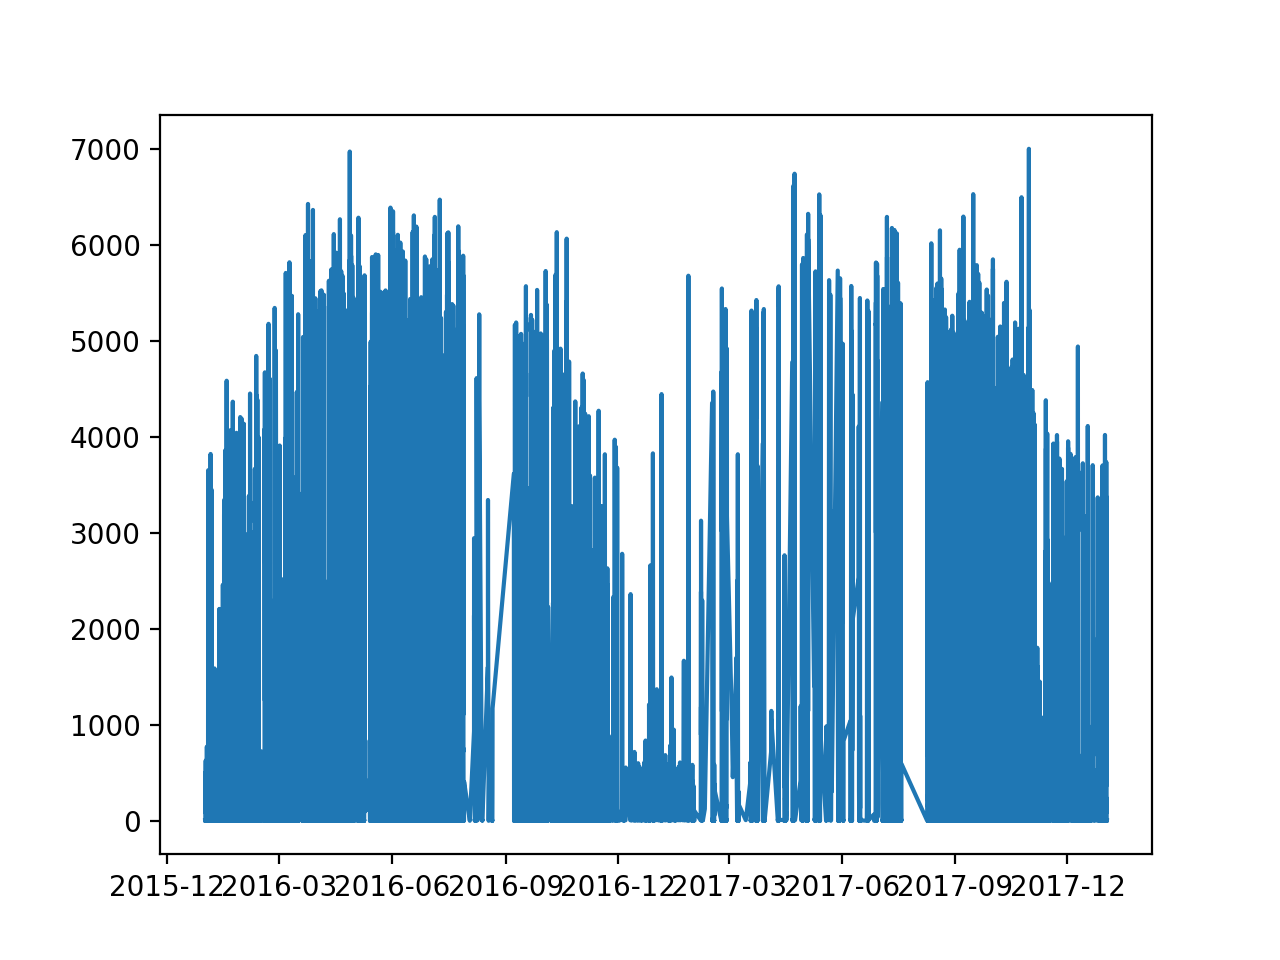

In [21]:
plt.plot(weather.index, weather.power_output)

## Add noise to the power output for a more realistic simulation

In [22]:
# add 5% of noise
noise = [np.random.normal(0,noise_level*p,1) for p in weather.power_output]

In [23]:
weather['PV_noise'] = np.absolute(np.asarray(noise))

/Applications/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
weather['power_output_noisy'] = np.maximum(weather.power_output - weather.PV_noise, 0)

/Applications/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
weather

,DHI,GHI,precipitation,sunshine_dur,temp,apparent_zenith,azimuth,DNI,irradiance,power_output,PV_noise,power_output_noisy
time,,,,,,,,,,,,
2016-01-01 00:00:00,1.0,2.0,0.0,0.0,3.9,154.801403,16.981575,0.0,1.031955,5.417765,0.272463,5.145303
2016-01-01 00:10:00,1.0,2.0,0.0,0.0,3.9,154.234825,22.163115,0.0,1.034692,5.432134,0.109197,5.322937
2016-01-01 00:20:00,1.0,2.0,0.0,0.0,3.9,153.529611,27.136373,0.0,1.038140,5.450233,0.431777,5.018456
2016-01-01 00:30:00,1.0,2.0,0.0,0.0,3.9,152.696956,31.877498,0.0,1.042254,5.471833,0.143276,5.328557
2016-01-01 00:40:00,1.0,2.0,0.0,0.0,3.9,151.748661,36.373869,0.0,1.046975,5.496617,0.639860,4.856757
2016-01-01 00:50:00,1.0,2.0,0.0,0.0,4.0,150.696566,40.622415,0.0,1.052222,5.524165,0.841718,4.682447
2016-01-01 01:00:00,1.0,2.0,0.0,0.0,4.0,149.552114,44.627546,0.0,1.057895,5.553949,1.151550,4.402399
2016-01-01 01:10:00,1.0,2.0,0.0,0.0,4.0,148.326067,48.399066,0.0,1.063872,5.585329,0.081590,5.503739
2016-01-01 01:20:00,1.0,2.0,0.1,0.0,4.0,147.028340,51.950324,0.0,1.070012,5.617561,0.665478,4.952083


In [27]:
weather.to_csv(os.path.join(path, 'data_out.csv'))